<a href="https://colab.research.google.com/github/AKHI-004/loan-application-notebook/blob/main/loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Please ensure the file 'loan_approval.csv' is uploaded to your Colab environment and the path is correct.
df = pd.read_csv("/content/loan_approval.csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3,645,No,1
44996,37,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1
44997,33,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6,604,No,1


preprocessing

In [57]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4,586,No,1


In [58]:
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3,645,No,1
44996,37,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1
44997,33,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6,604,No,1
44999,24,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3,628,No,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   44999 non-null  object 
 2   person_education                44997 non-null  object 
 3   person_income                   44999 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           44998 non-null  object 
 6   loan_amnt                       44998 non-null  float64
 7   loan_intent                     44999 non-null  object 
 8   loan_int_rate                   44999 non-null  float64
 9   loan_percent_income             44997 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [60]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.499900e+04,45000.000000,4.499800e+04,44999.000000,44997.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031762e+04,5.410333,9.635541e+03,11.012625,0.139729,5.867489,632.608756,0.222222
std,6.045108,8.042282e+04,6.063532,1.332906e+04,3.182025,0.087213,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,-3.000000e+03,-40.000000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720200e+04,1.000000,5.000000e+03,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8.000000e+03,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578600e+04,8.000000,1.223050e+04,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,2.500000e+06,200.000000,0.660000,30.000000,850.000000,1.000000


In [61]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [62]:
df.shape

(45000, 14)

In [100]:
#Visualize bar graphs for three categorical features, illustrating the distribution of
#samples across each category
categorical_features = ['person_education', 'person_home_ownership', 'loan_intent']

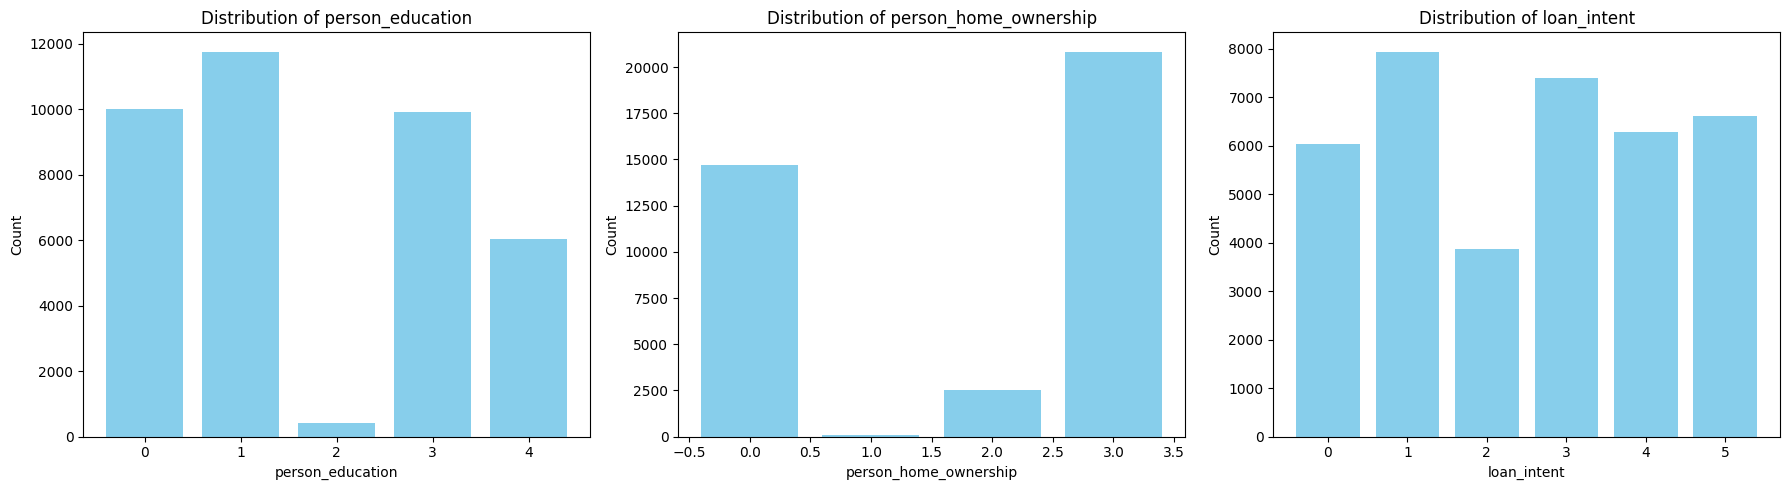

In [101]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(categorical_features):
    value_counts = df[feature].value_counts()
    axes[i].bar(value_counts.index, value_counts.values, color='skyblue')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

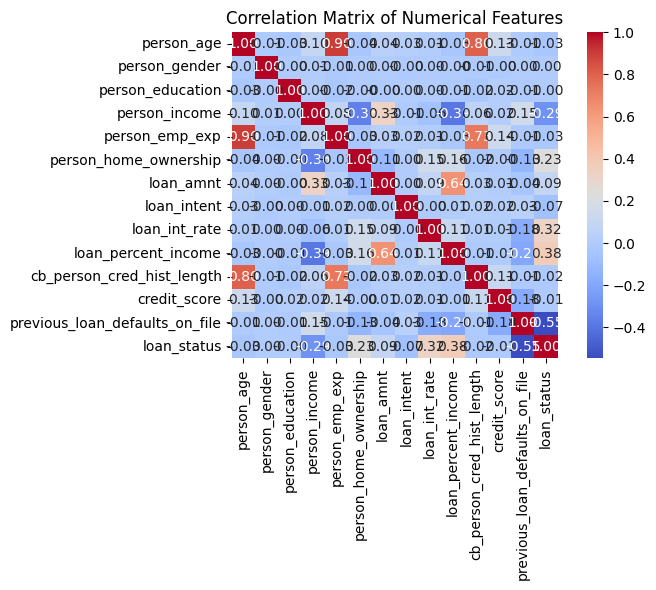

In [103]:
 #Plot the correlation matrix (using heatmap) to explore relationships between
#numerical features

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_exp'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>],
       [<Axes: title={'center': 'credit_score'}>, <Axes: >]], dtype=object)

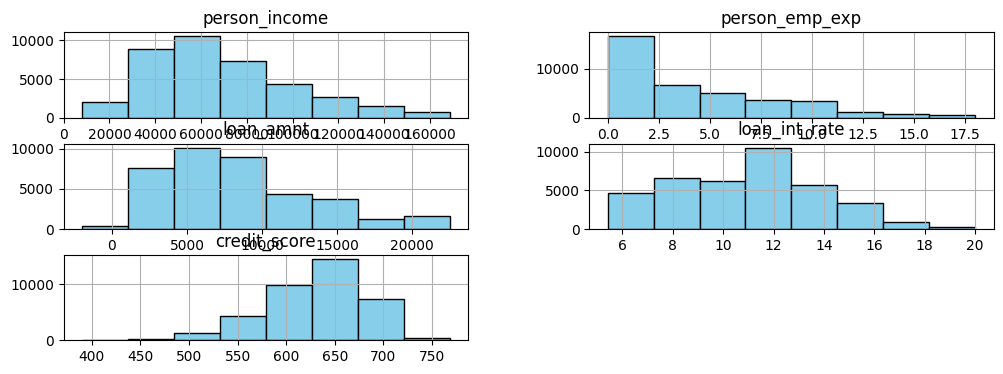

In [106]:
#Examine the distribution of at least three numerical features
df[[ 'person_income', 'person_emp_exp','loan_amnt','loan_int_rate','credit_score']].hist(bins=8, figsize=(12, 4), color='skyblue', edgecolor='black')

checking null

In [63]:
df.isna()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [64]:
df.isna().sum()

,0
person_age,0
person_gender,1
person_education,3
person_income,1
person_emp_exp,0
person_home_ownership,2
loan_amnt,2
loan_intent,1
loan_int_rate,1
loan_percent_income,3


In [65]:
df.dropna(inplace=True)
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3,645,No,1
44996,37,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1
44997,33,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6,604,No,1


In [66]:
df.duplicated().sum()

np.int64(0)

boxploting

In [67]:
#plt.boxplot(df['person_age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d0317f7a410>,
 'caps': [<matplotlib.lines.Line2D at 0x7d0317f7bc90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d0317fbf650>],
 'medians': [<matplotlib.lines.Line2D at 0x7d03683c8990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d0318791850>],
 'means': []}

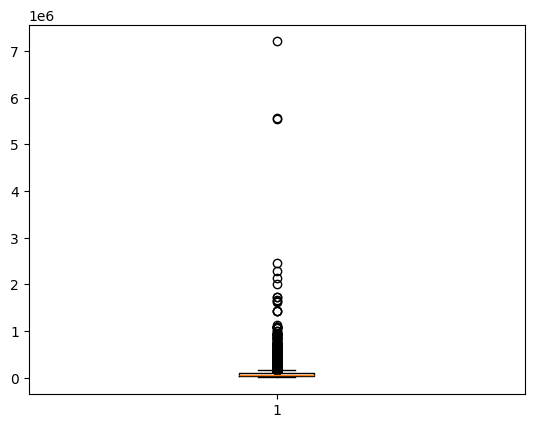

In [68]:
plt.boxplot(df['person_income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d0317e40d50>,
 'caps': [<matplotlib.lines.Line2D at 0x7d0317e42110>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d0317e403d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d0317e43510>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d0317e43e90>],
 'means': []}

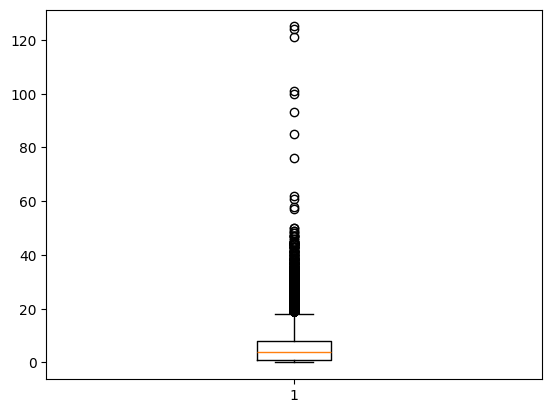

In [69]:
plt.boxplot(df['person_emp_exp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d031856d8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d0318560310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d031856ce50>],
 'medians': [<matplotlib.lines.Line2D at 0x7d0318563350>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d031855c750>],
 'means': []}

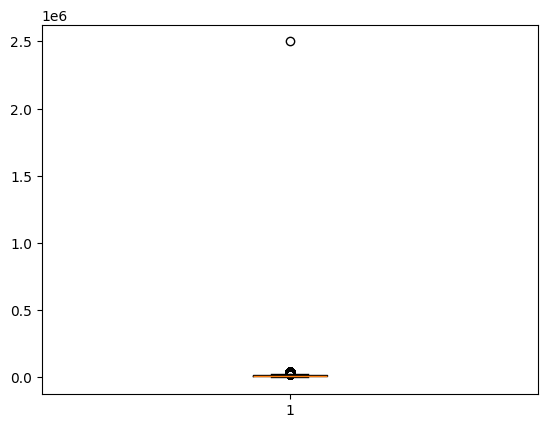

In [70]:
plt.boxplot(df['loan_amnt'])

In [71]:
#plt.boxplot(df['loan_int_rate'])

In [72]:
#plt.boxplot(df['loan_percent_income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d03186de3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d03186c9d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d03186dfc90>],
 'medians': [<matplotlib.lines.Line2D at 0x7d03186d1b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d03186d1b50>],
 'means': []}

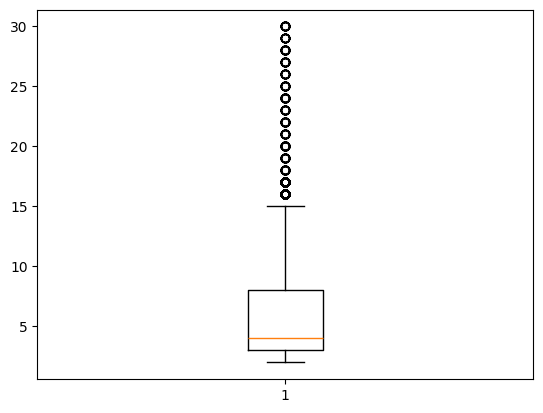

In [73]:
plt.boxplot(df['cb_person_cred_hist_length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d0318912510>,
 'caps': [<matplotlib.lines.Line2D at 0x7d031880dd10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d03187f1a50>],
 'medians': [<matplotlib.lines.Line2D at 0x7d031880fc50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d031880c190>],
 'means': []}

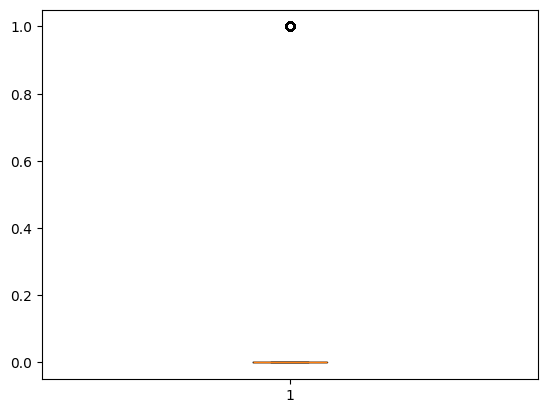

In [74]:
plt.boxplot(df['loan_status'])

In [75]:
#plt.boxplot(df['credit_score'])

Handling outliers

In [76]:
#df['person_age'] = pd.to_numeric(df['person_age'])
#Q1=df['person_age'].quantile(0.25)
#Q3=df['person_age'].quantile(0.75)
#IQR=Q3-Q1

#lowerbound=Q1-(IQR*1.5)
#upperbound=Q3+(IQR*1.5)

#df=df[~
    #((df['person_age']<(lowerbound))|(
        #df['person_age']>(upperbound)))]

In [77]:
#import matplotlib.pyplot as plt
#plt.boxplot(df['person_age'])
#plt.show()

In [78]:
df['person_income'] = pd.to_numeric(df['person_income'])
Q1=df['person_income'].quantile(0.25)
Q3=df['person_income'].quantile(0.75)
IQR=Q3-Q1

lowerbound=Q1-(IQR*1.5)
upperbound=Q3+(IQR*1.5)

df=df[~
    ((df['person_income']<(lowerbound))|(
        df['person_income']>(upperbound)))]

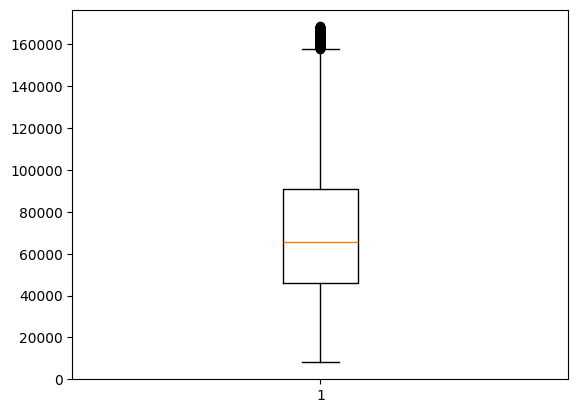

In [79]:
import matplotlib.pyplot as plt
plt.boxplot(df['person_income'])
plt.show()

In [80]:
df['person_emp_exp'] = pd.to_numeric(df['person_emp_exp'])
Q1=df['person_emp_exp'].quantile(0.25)
Q3=df['person_emp_exp'].quantile(0.75)
IQR=Q3-Q1

lowerbound=Q1-(IQR*1.5)
upperbound=Q3+(IQR*1.5)

df=df[~
    ((df['person_emp_exp']<(lowerbound))|(
        df['person_emp_exp']>(upperbound)))]

/tmp/ipython-input-80-8298735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['person_emp_exp'] = pd.to_numeric(df['person_emp_exp'])


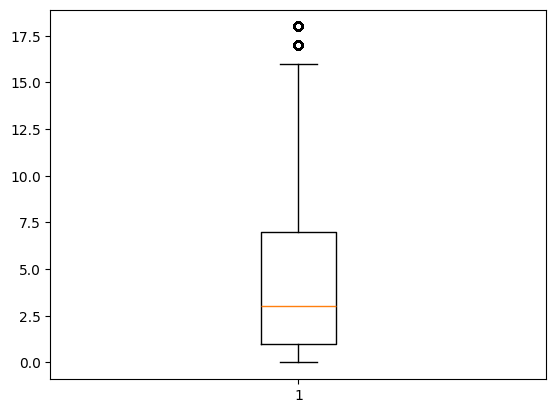

In [81]:
import matplotlib.pyplot as plt
plt.boxplot(df['person_emp_exp'])
plt.show()

In [83]:
df['loan_amnt'] = pd.to_numeric(df['loan_amnt'])
Q1=df['loan_amnt'].quantile(0.25)
Q3=df['loan_amnt'].quantile(0.75)
IQR=Q3-Q1

lowerbound=Q1-(IQR*1.5)
upperbound=Q3+(IQR*1.5)

df=df[~
    ((df['loan_amnt']<(lowerbound))|(
        df['loan_amnt']>(upperbound)))]

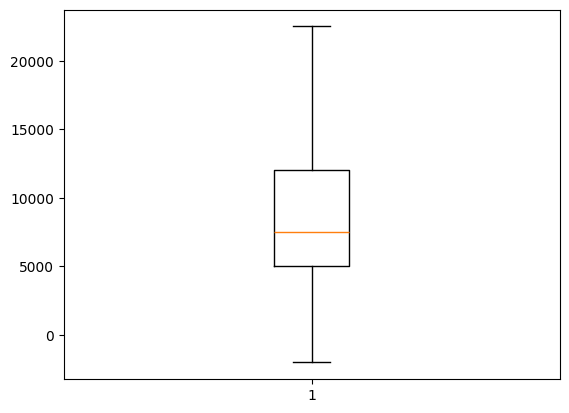

In [84]:
import matplotlib.pyplot as plt
plt.boxplot(df['loan_amnt'])
plt.show()

In [85]:
#df['loan_int_rate'] = pd.to_numeric(df['loan_int_rate'])
#Q1=df['loan_int_rate'].quantile(0.25)
#Q3=df['loan_int_rate'].quantile(0.75)
#IQR=Q3-Q1

#lowerbound=Q1-(IQR*1.5)
#upperbound=Q3+(IQR*1.5)

#df=df[~
    #((df['loan_int_rate']<(lowerbound))|(
        #df['loan_int_rate']>(upperbound)))]

In [86]:
#import matplotlib.pyplot as plt
#plt.boxplot(df['loan_int_rate'])
#plt.show()

In [87]:
#df['loan_percent_income'] = pd.to_numeric(df['loan_percent_income'])
#Q1=df['loan_percent_income'].quantile(0.25)
#Q3=df['loan_percent_income'].quantile(0.75)
#IQR=Q3-Q1

#lowerbound=Q1-(IQR*1.5)
#upperbound=Q3+(IQR*1.5)

#df=df[~
    #((df['loan_percent_income']<(lowerbound))|(
        #df['loan_percent_income']>(upperbound)))]

In [88]:
#import matplotlib.pyplot as plt
#plt.boxplot(df['loan_percent_income'])
#plt.show()

In [89]:
df['cb_person_cred_hist_length'] = pd.to_numeric(df['cb_person_cred_hist_length'])
Q1=df['cb_person_cred_hist_length'].quantile(0.25)
Q3=df['cb_person_cred_hist_length'].quantile(0.75)
IQR=Q3-Q1

lowerbound=Q1-(IQR*1.5)
upperbound=Q3+(IQR*1.5)

df=df[~
    ((df['cb_person_cred_hist_length']<(lowerbound))|(
        df['cb_person_cred_hist_length']>(upperbound)))]

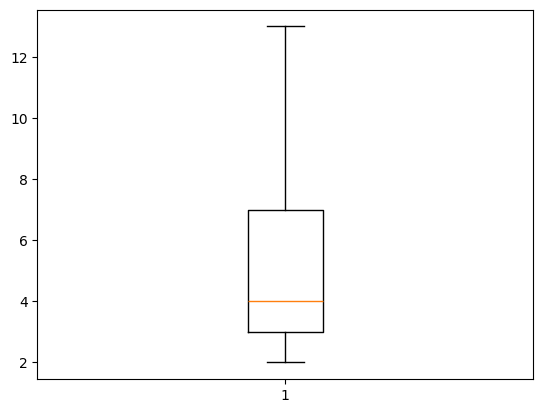

In [90]:
import matplotlib.pyplot as plt
plt.boxplot(df['cb_person_cred_hist_length'])
plt.show()

In [91]:
#df['credit_score'] = pd.to_numeric(df['credit_score'])
#Q1=df['credit_score'].quantile(0.25)
#Q3=df['credit_score'].quantile(0.75)
#IQR=Q3-Q1

#lowerbound=Q1-(IQR*1.5)
#upperbound=Q3+(IQR*1.5)

#df=df[~
    #((df['credit_score']<(lowerbound))|(
        #df['credit_score']>(upperbound)))]

In [92]:
#import matplotlib.pyplot as plt
#plt.boxplot(df['credit_score'])
#plt.show()

label encoding

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['person_gender'] = le.fit_transform(df['person_gender'])
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3,635,No,1
5,21,0,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2,532,No,1
9,21,0,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3,640,No,1
11,21,0,Associate,13113.0,0,OWN,4500.0,HOMEIMPROVEMENT,8.63,0.34,2,651,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,1,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3,645,No,1
44996,37,0,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1
44997,33,1,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,1,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6,604,No,1


In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['person_education'] = le.fit_transform(df['person_education'])
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,0,3,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,0,3,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3,635,No,1
5,21,0,3,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2,532,No,1
9,21,0,3,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3,640,No,1
11,21,0,0,13113.0,0,OWN,4500.0,HOMEIMPROVEMENT,8.63,0.34,2,651,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,1,0,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3,645,No,1
44996,37,0,0,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1
44997,33,1,0,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,1,1,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6,604,No,1


In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['person_home_ownership'] = le.fit_transform(df['person_home_ownership'])
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,0,3,12282.0,0,2,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,0,3,12438.0,3,0,5500.0,MEDICAL,12.87,0.44,3,635,No,1
5,21,0,3,12951.0,0,2,2500.0,VENTURE,7.14,0.19,2,532,No,1
9,21,0,3,12739.0,0,2,1600.0,VENTURE,14.74,0.13,3,640,No,1
11,21,0,0,13113.0,0,2,4500.0,HOMEIMPROVEMENT,8.63,0.34,2,651,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,1,0,47971.0,6,3,15000.0,MEDICAL,15.66,0.31,3,645,No,1
44996,37,0,0,65800.0,17,3,9000.0,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1
44997,33,1,0,56942.0,7,3,2771.0,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,1,1,33164.0,4,3,12000.0,EDUCATION,13.23,0.36,6,604,No,1


In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['loan_intent'] = le.fit_transform(df['loan_intent'])
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2,504,Yes,0
2,25,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3,635,No,1
5,21,0,3,12951.0,0,2,2500.0,5,7.14,0.19,2,532,No,1
9,21,0,3,12739.0,0,2,1600.0,5,14.74,0.13,3,640,No,1
11,21,0,0,13113.0,0,2,4500.0,2,8.63,0.34,2,651,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3,645,No,1
44996,37,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11,621,No,1
44997,33,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10,668,No,1
44998,29,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6,604,No,1


In [97]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['previous_loan_defaults_on_file'] = le.fit_transform(df['previous_loan_defaults_on_file'])
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2,504,1,0
2,25,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3,635,0,1
5,21,0,3,12951.0,0,2,2500.0,5,7.14,0.19,2,532,0,1
9,21,0,3,12739.0,0,2,1600.0,5,14.74,0.13,3,640,0,1
11,21,0,0,13113.0,0,2,4500.0,2,8.63,0.34,2,651,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3,645,0,1
44996,37,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11,621,0,1
44997,33,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10,668,0,1
44998,29,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6,604,0,1


In [98]:
df.corr()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
person_age,1.000000,-0.005157,-0.026802,0.097322,0.901567,-0.035484,0.036729,0.025586,0.005718,-0.033033,0.803268,0.129448,-0.005986,-0.027852
person_gender,-0.005157,1.000000,-0.001233,0.012173,-0.010201,0.000037,0.004527,-0.004725,0.001687,-0.001262,-0.008180,-0.003539,0.003680,0.000445
person_education,-0.026802,-0.001233,1.000000,0.004983,-0.023316,-0.002410,-0.004117,0.004702,0.003656,-0.009941,-0.022546,0.015610,-0.005343,-0.000743
person_income,0.097322,0.012173,0.004983,1.000000,0.079370,-0.356847,0.325436,-0.006876,-0.063882,-0.391280,0.060990,0.015010,0.151223,-0.285017
person_emp_exp,0.901567,-0.010201,-0.023316,0.079370,1.000000,-0.032120,0.030319,0.024128,0.010739,-0.027419,0.731833,0.140124,-0.011357,-0.025114
person_home_ownership,-0.035484,0.000037,-0.002410,-0.356847,-0.032120,1.000000,-0.108842,0.000493,0.152086,0.155540,-0.024157,-0.002057,-0.125492,0.228199
loan_amnt,0.036729,0.004527,-0.004117,0.325436,0.030319,-0.108842,1.000000,0.002270,0.090126,0.642452,0.026428,0.005073,-0.044688,0.088031
loan_intent,0.025586,-0.004725,0.004702,-0.006876,0.024128,0.000493,0.002270,1.000000,-0.003822,0.009109,0.023890,0.015604,0.034799,-0.065322
loan_int_rate,0.005718,0.001687,0.003656,-0.063882,0.010739,0.152086,0.090126,-0.003822,1.000000,0.105735,0.013179,0.010742,-0.178577,0.324625
loan_percent_income,-0.033033,-0.001262,-0.009941,-0.391280,-0.027419,0.155540,0.642452,0.009109,0.105735,1.000000,-0.014468,-0.005879,-0.202344,0.376722
